In [6]:
import os
os.system('source /Users/sologaes/project/hyper/lalsuite/_inst/etc/lalsimulation-user-env.sh')
import inspect, copy
import numpy as np
from pycbc.waveform import td_approximants, fd_approximants
from astropy import units as u
from astropy.constants import G, c, M_sun, R_sun, L_sun, au, pc
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['Times New Roman'],
            'axes.unicode_minus': False
         }
rcParams.update(config)

/Users/sologaes/anaconda3/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [8]:
approximants = td_approximants()
def check_hyperbolic():   
    if "HyperbolicTD" in approximants:
        print("true")

check_hyperbolic()

true


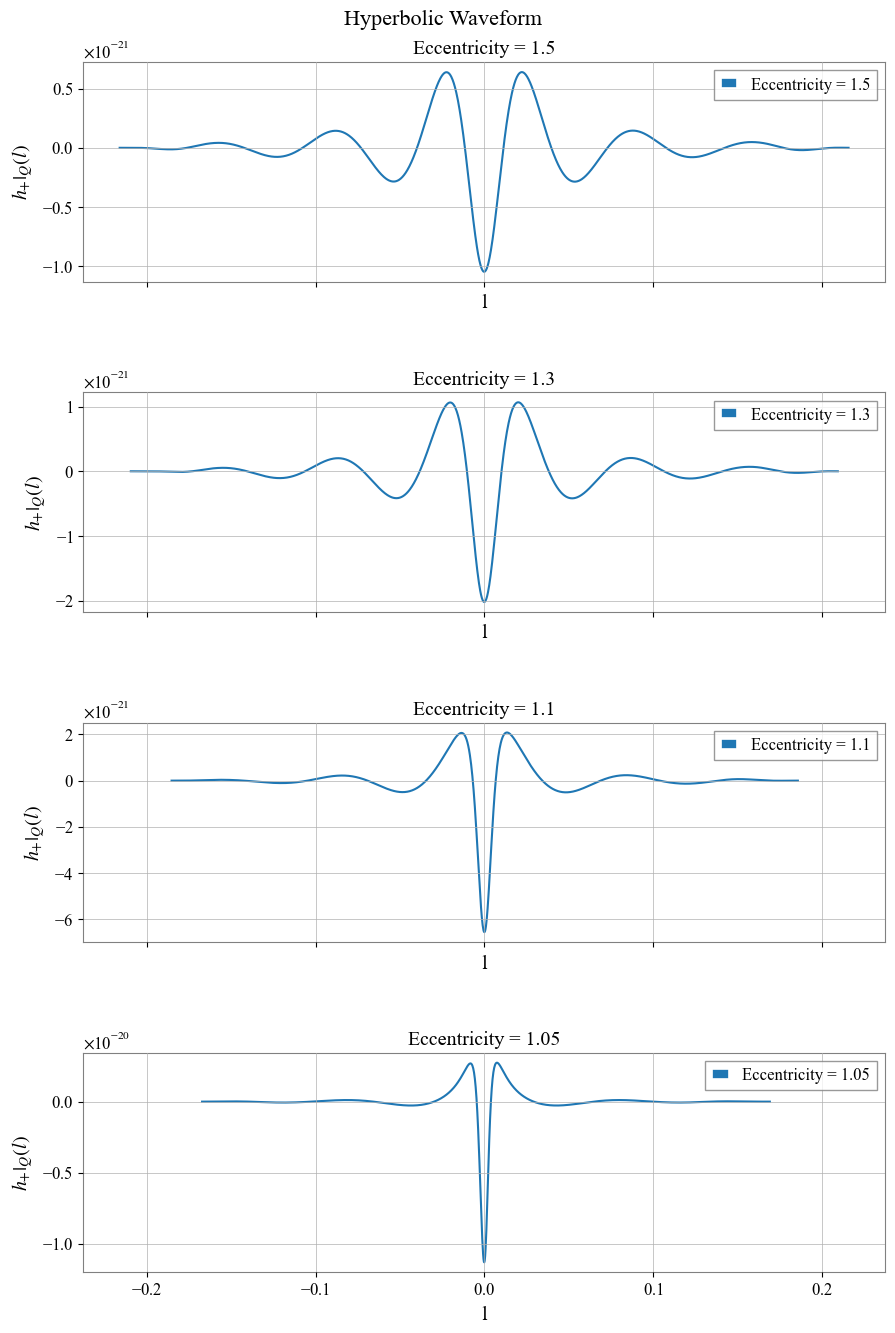

In [30]:
waveform = HyperbolicTD()
f, axes = plt.subplots(4, 1, figsize=(10, 14), sharex=True)
eccentricities = [1.5, 1.3, 1.1, 1.05]
labels = ['Eccentricity = 1.5', 'Eccentricity = 1.3', 'Eccentricity = 1.1', 'Eccentricity = 1.05']

for ax, ecc, label in zip(axes, eccentricities, labels):
    data = waveform.time_domain(parameters={"m1": 10 * M_sun, "m2": 10 * M_sun, "hyperbolic_eccentricity": ecc})
    ax.plot(data['plus'], label=label)
    ax.legend()
    ax.set_title(label)
    ax.set_xlabel('l')
    ax.set_ylabel(r'$h_{+}|_{Q}(l)$')

plt.tight_layout(pad = 3.5)
f.suptitle('Hyperbolic Waveform', fontsize=16)
#f.savefig("waveform.png")
plt.show()
